In [27]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import matplotlib.pyplot as plt
import os,sys
import glob
import numpy as np
import scipy
from scipy import interpolate


plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

In [64]:
run=1213
file = "./acc_scan_{}.csv".format(run)

DF=pd.read_csv(file)


In [65]:
DF

,i,dp_min,theta_rmin,dp_min_count,dp_max,theta_rmax,dp_max_count,th_min,phi_rmin,th_min_count,th_max,phi_rmax,th_max_count,ph_min,dp_rmin,ph_min_count,ph_max,dp_rmax,ph_max_count
0,0,-0.070000,0.919576,33148,0.070000,0.990561,35141,-0.070000,0.993698,36902,0.070000,1.02190,39361,-0.0525,1.015020,33135,0.0525,1.01251,32819
1,1,-0.066667,0.919576,33148,0.066667,0.990561,35141,-0.066667,0.993105,36880,0.066667,1.01967,39263,-0.0500,1.014960,33133,0.0500,1.01230,32812
2,2,-0.063333,0.919576,33148,0.063333,0.990561,35141,-0.063333,0.992974,36845,0.063333,1.01583,39026,-0.0475,1.014680,33124,0.0475,1.01211,32806
3,3,-0.060000,0.919576,33148,0.060000,0.990561,35141,-0.060000,0.992534,36737,0.060000,1.01125,38625,-0.0450,1.014500,33118,0.0450,1.01189,32799
4,4,-0.056667,0.919576,33148,0.056667,0.990505,35139,-0.056667,0.992965,36517,0.056667,1.00587,37975,-0.0425,1.014220,33109,0.0425,1.01165,32791
5,5,-0.053333,0.919548,33147,0.053333,0.989941,35119,-0.053333,0.998293,36111,0.053333,1.00823,37106,-0.0400,1.013950,33100,0.0400,1.01131,32780
6,6,-0.050000,0.919439,33141,0.050000,0.985724,34856,-0.050000,1.000590,35493,0.050000,1.00394,36056,-0.0375,1.013550,33087,0.0375,1.01106,32772
7,7,-0.046667,0.940730,33121,0.046667,0.992050,34278,-0.046667,0.999292,34658,0.046667,1.00035,34946,-0.0350,1.013000,33069,0.0350,1.01071,32758
8,8,-0.043333,0.980833,33072,0.043333,1.004830,33534,-0.043333,1.009800,33674,0.043333,1.00882,33732,-0.0325,1.010400,32966,0.0325,1.01015,32708
9,9,-0.040000,1.009390,32538,0.040000,1.009390,32538,-0.040000,1.009390,32538,0.040000,1.00939,32538,-0.0300,1.009390,32538,0.0300,1.00939,32538


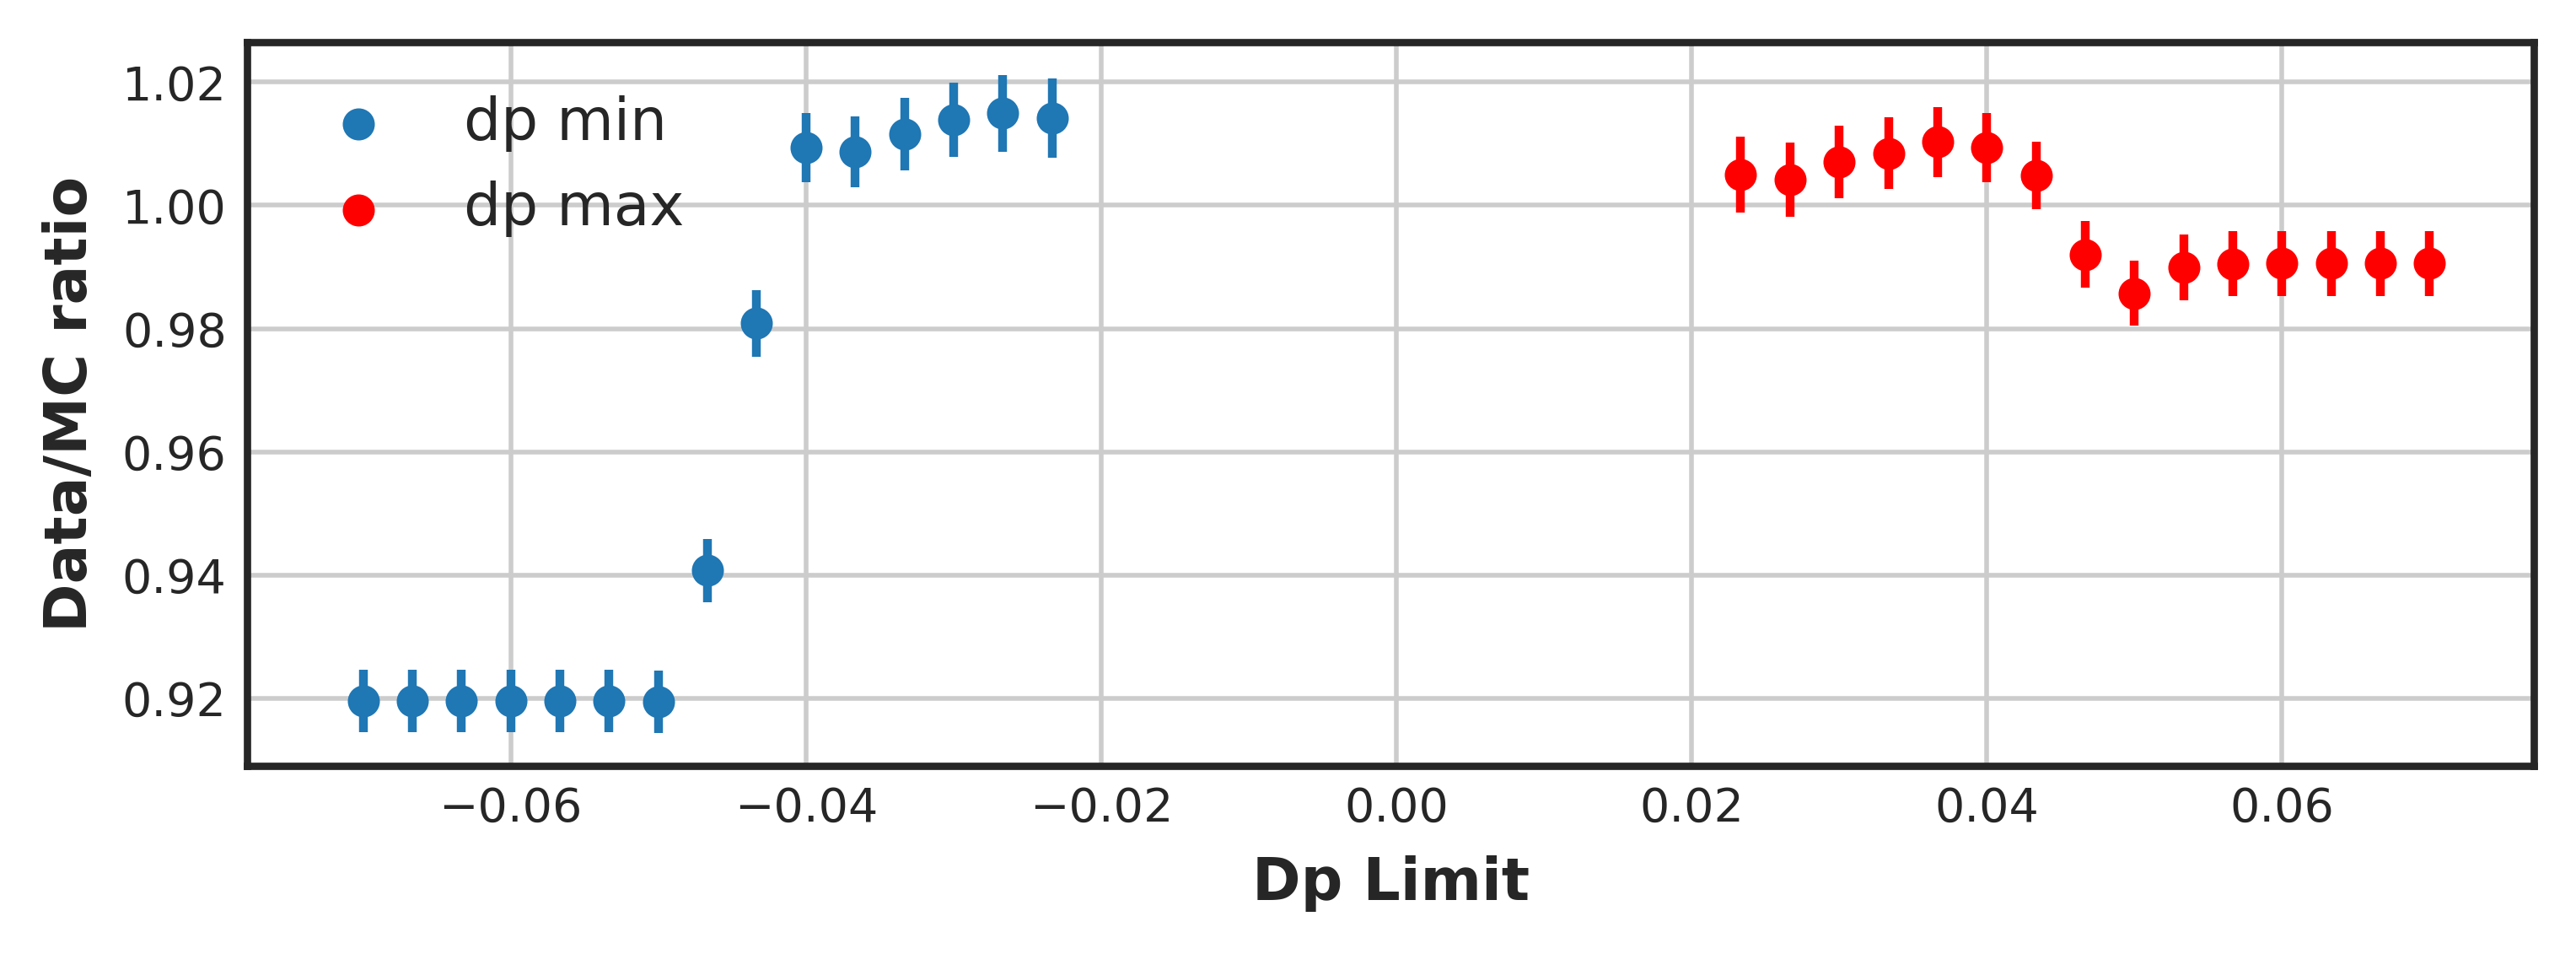

In [66]:
fig= plt.figure(dpi=500,figsize=(7,5))
x=fig.add_subplot(2,1,1)
DF['dp_min_err'] = DF['theta_rmin']* 1 / np.sqrt(DF['dp_min_count'])
DF['dp_max_err'] = DF['theta_rmax']* 1 / np.sqrt(DF['dp_max_count'])
DF.plot(ax=x,x="dp_min",y="theta_rmin",yerr='dp_min_err',kind='scatter',label="dp min")
DF.plot(ax=x,x="dp_max",y="theta_rmax",yerr='dp_max_err',kind='scatter',c='r',label="dp max")
x.set_ylabel("Data/MC ratio")
x.set_xlabel("Dp Limit")
plt.grid(True)
fig.savefig("/home/jbane/images/dp_scan.ps",bbox_inches='tight')
fig.savefig("/home/jbane/images/dp_scan.eps",bbox_inches='tight')
fig.savefig("/home/jbane/images/dp_scan.pdf",bbox_inches='tight')

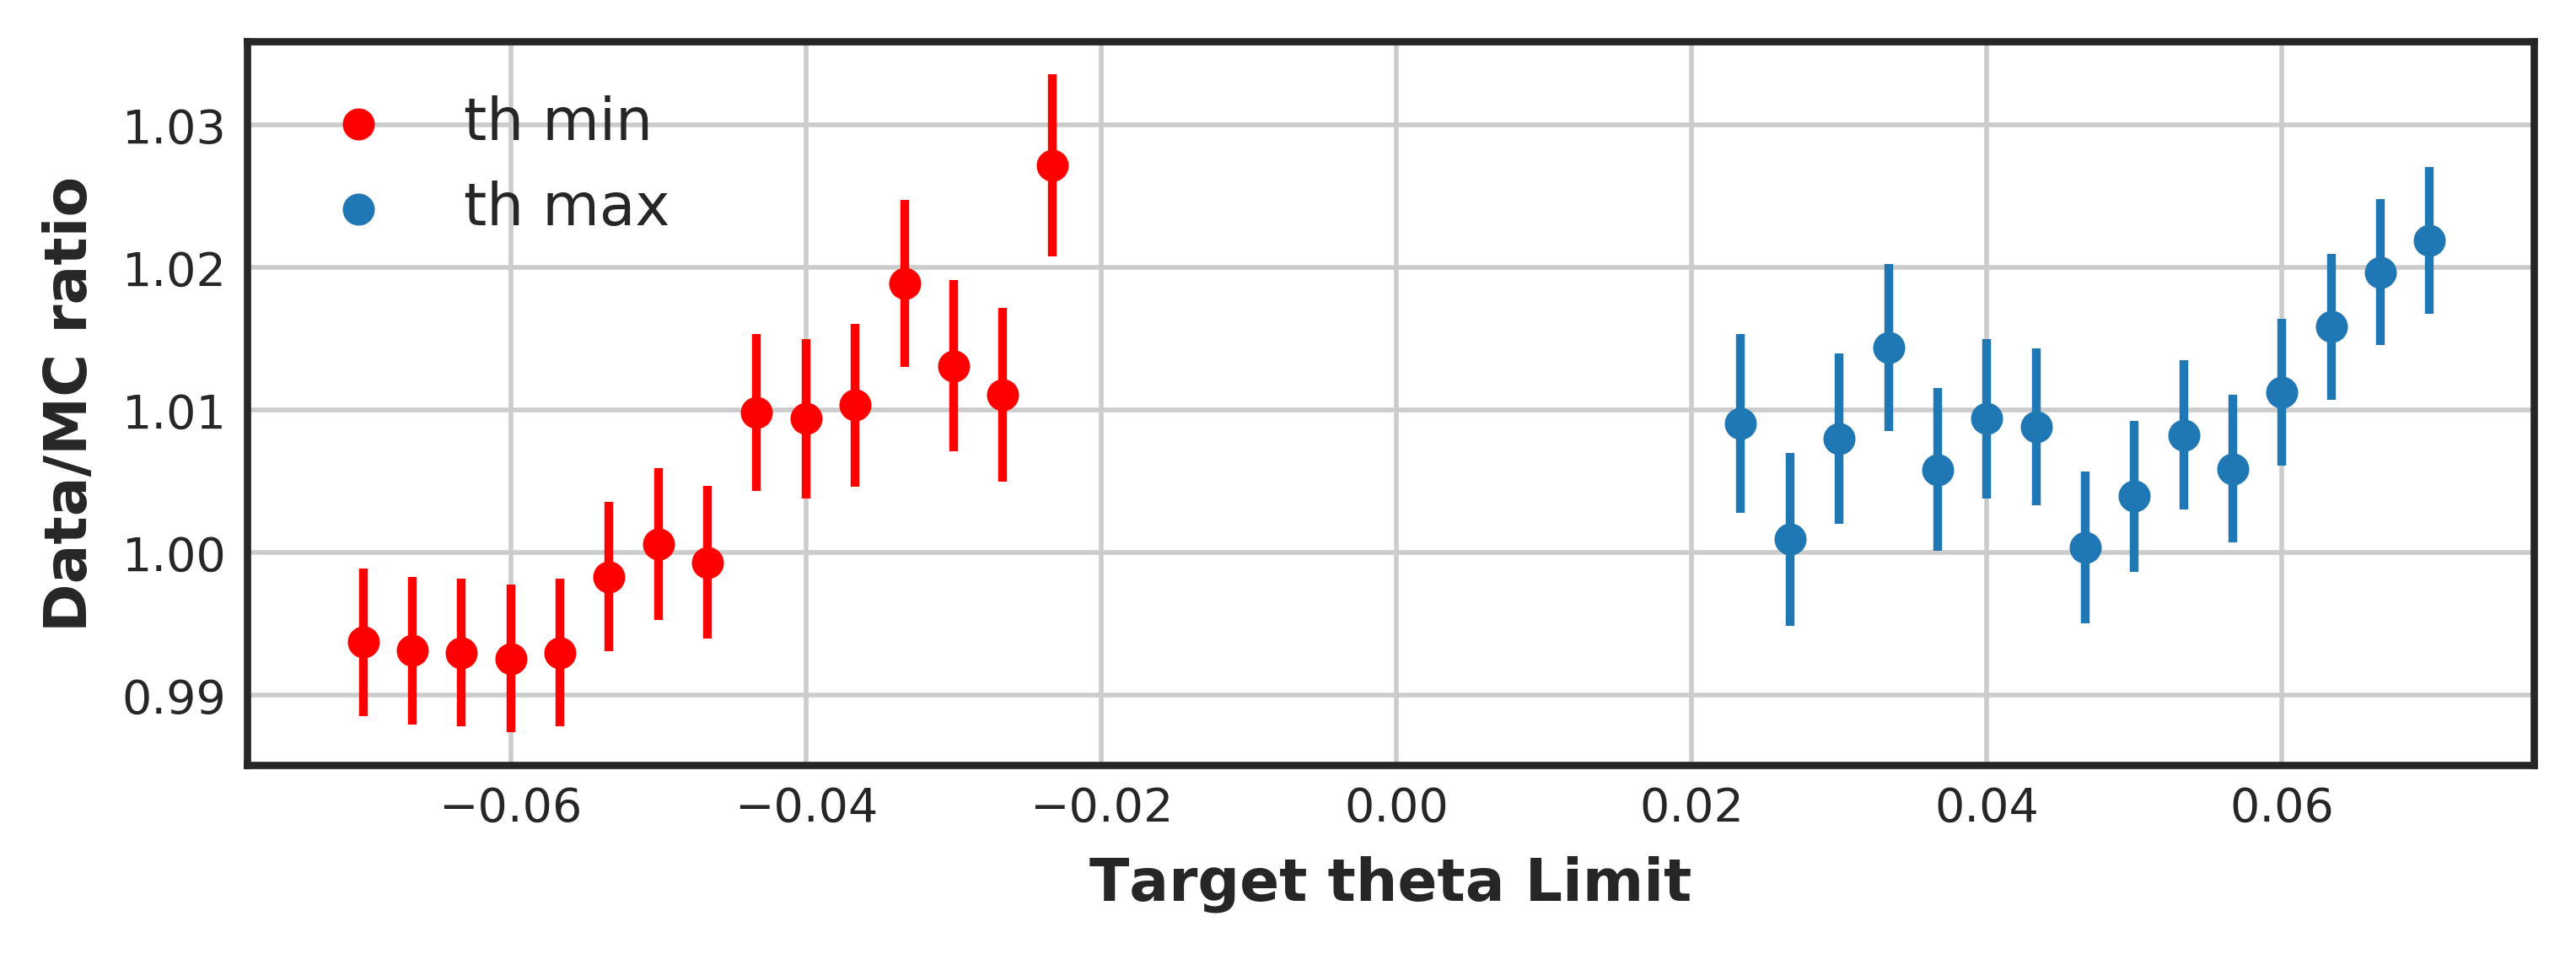

In [67]:
fig= plt.figure(dpi=500,figsize=(7,5))
x=fig.add_subplot(2,1,1)
DF['th_min_err'] = DF['phi_rmin']* 1 / np.sqrt(DF['th_min_count'])
DF['th_max_err'] = DF['phi_rmax']* 1 / np.sqrt(DF['th_max_count'])
DF.plot(ax=x,x="th_min",y="phi_rmin",yerr='th_min_err',kind='scatter',c='r',label="th min")
DF.plot(ax=x,x="th_max",y="phi_rmax",yerr='th_max_err',kind='scatter',label="th max")
x.set_ylabel("Data/MC ratio")
x.set_xlabel("Target theta Limit")
plt.grid(True)
fig.savefig("/home/jbane/images/th_scan.ps",bbox_inches='tight')
fig.savefig("/home/jbane/images/th_scan.eps",bbox_inches='tight')
fig.savefig("/home/jbane/images/th_scan.pdf",bbox_inches='tight')

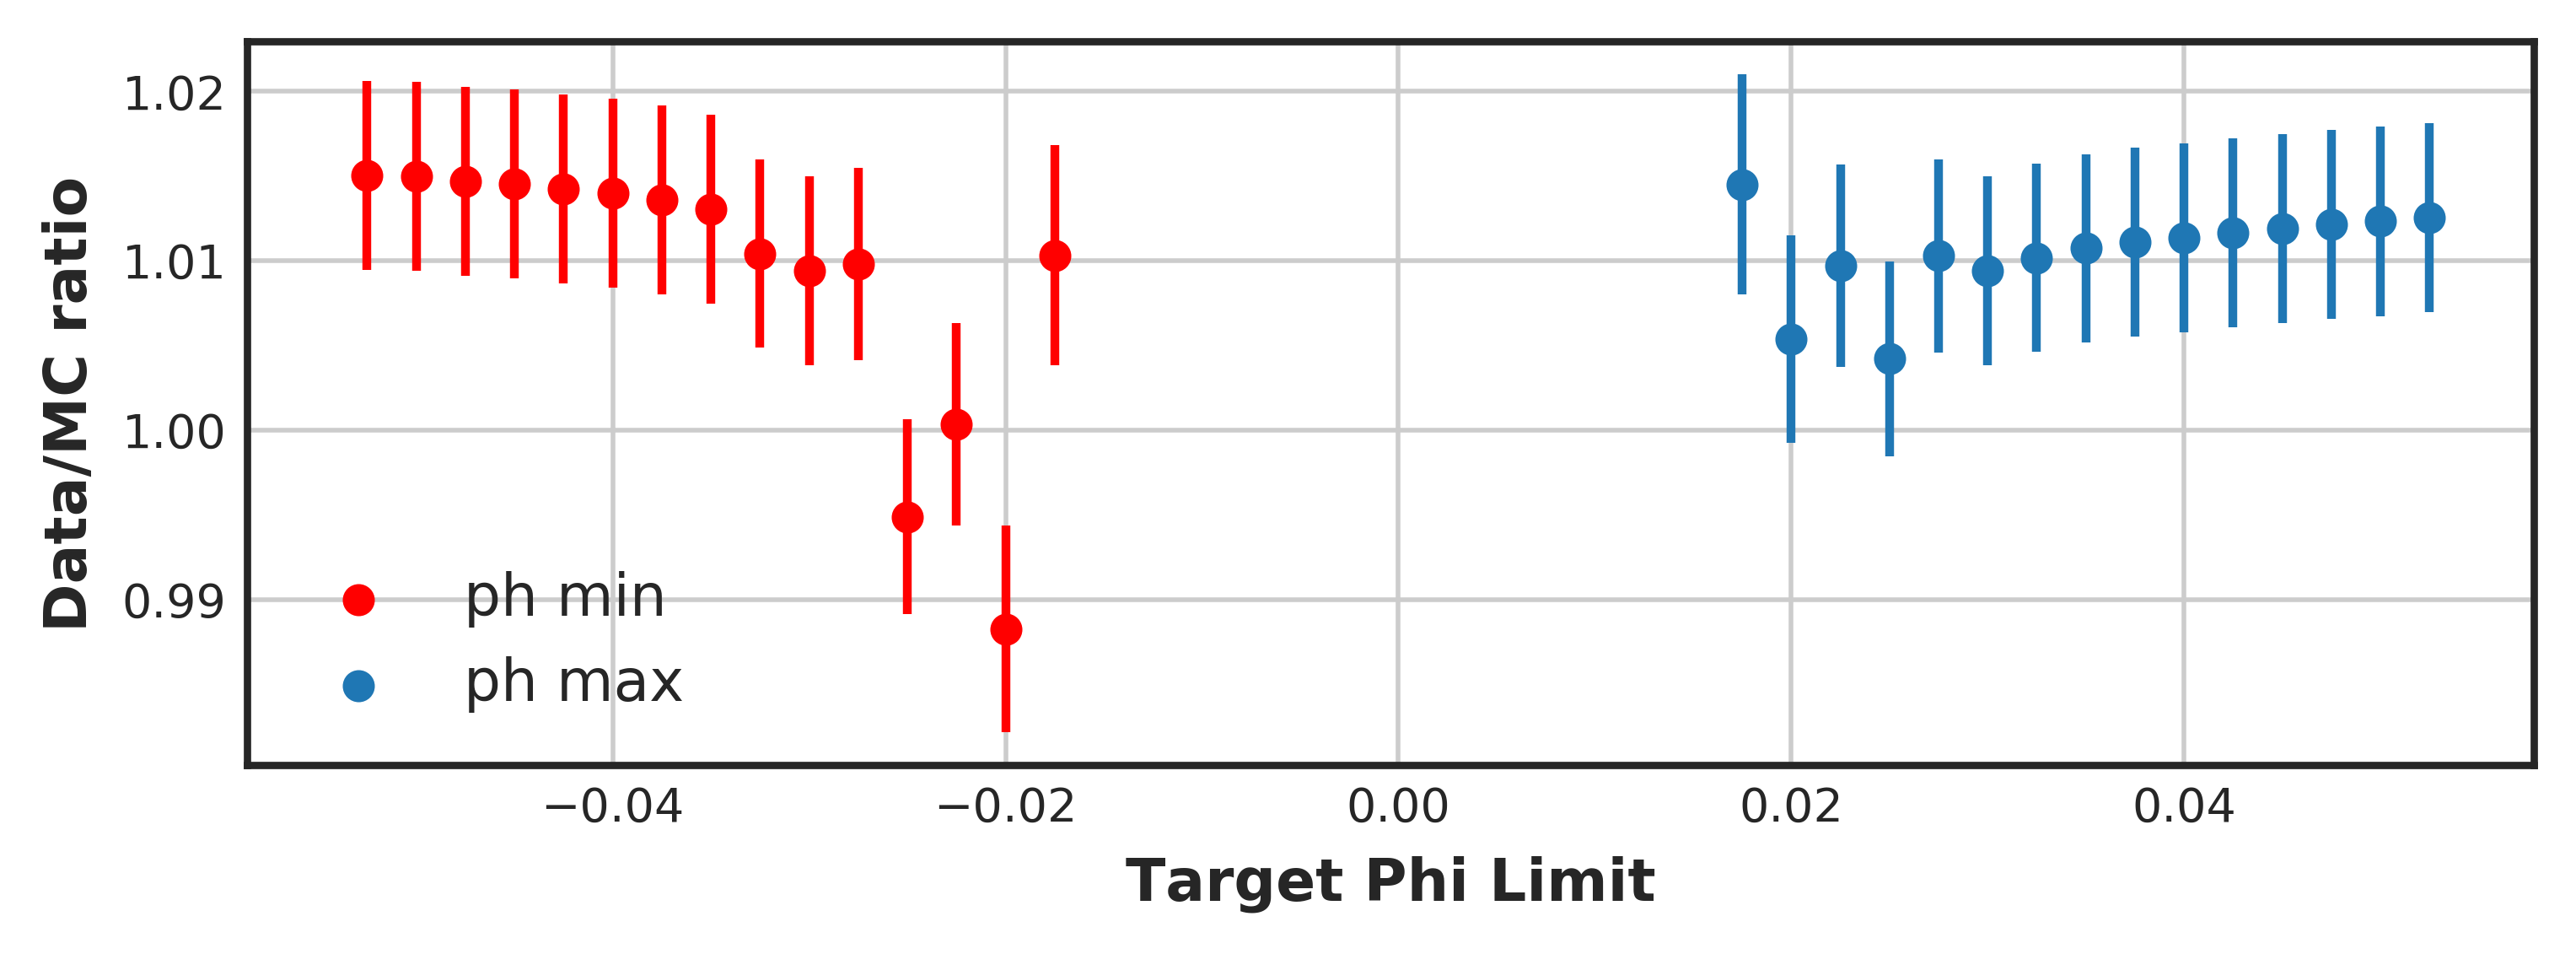

In [68]:
fig= plt.figure(dpi=500,figsize=(7,5))
x=fig.add_subplot(2,1,1)
DF['ph_min_err'] = DF['dp_rmin']* 1 / np.sqrt(DF['ph_min_count'])
DF['ph_max_err'] = DF['dp_rmax']* 1 / np.sqrt(DF['ph_max_count'])
DF.plot(ax=x,x="ph_min",y="dp_rmin",yerr='ph_min_err',kind='scatter',c='r',label="ph min")
DF.plot(ax=x,x="ph_max",y="dp_rmax",yerr='ph_min_err',kind='scatter',label="ph max")
x.set_ylabel("Data/MC ratio")
x.set_xlabel("Target Phi Limit")
plt.grid(True)
fig.savefig("/home/jbane/images/ph_scan.ps",bbox_inches='tight')
fig.savefig("/home/jbane/images/ph_scan.eps",bbox_inches='tight')
fig.savefig("/home/jbane/images/ph_scan.pdf",bbox_inches='tight')